<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PyTorch" data-toc-modified-id="PyTorch-1">PyTorch</a></span><ul class="toc-item"><li><span><a href="#PyTorch-설치" data-toc-modified-id="PyTorch-설치-1.1">PyTorch 설치</a></span><ul class="toc-item"><li><span><a href="#MacOS-with-M1" data-toc-modified-id="MacOS-with-M1-1.1.1">MacOS with M1</a></span></li></ul></li><li><span><a href="#PyTorch-기본-문법" data-toc-modified-id="PyTorch-기본-문법-1.2">PyTorch 기본 문법</a></span></li></ul></li><li><span><a href="#ResNet-구현" data-toc-modified-id="ResNet-구현-2">ResNet 구현</a></span><ul class="toc-item"><li><span><a href="#기본-구조-설명" data-toc-modified-id="기본-구조-설명-2.1">기본 구조 설명</a></span></li><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-2.2">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-구조-만들기" data-toc-modified-id="2.-구조-만들기-2.3">2. 구조 만들기</a></span><ul class="toc-item"><li><span><a href="#Residual-Block" data-toc-modified-id="Residual-Block-2.3.1">Residual Block</a></span></li><li><span><a href="#ResNet-34" data-toc-modified-id="ResNet-34-2.3.2">ResNet-34</a></span></li></ul></li><li><span><a href="#3.-모형-학습" data-toc-modified-id="3.-모형-학습-2.4">3. 모형 학습</a></span></li></ul></li></ul></div>

아래 모든 코드는 `Google Colab`에서 실행

# PyTorch

<p align="center"><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk8SLv%2Fbtq2gxiXKs3%2F0sSDRS2o28lCIXdLdNK9Vk%2Fimg.png"></p>

<br>

* 2016년 발표된 파이썬 기반 오픈소스 머신러닝/딥러닝 라이브러리

* `Numpy`, `Pandas` 등 데이터를 다룰 때 이용되는 기본 툴과 연계해서 쓸 수 있고, 구현이 쉽고 빠르다는 것이 장점



## PyTorch 설치

* 우선 사전에 `Anaconda`가 설치된 환경이라고 가정.

* https://pytorch.org 에 접속해 설치환경을 선택해주면, 

    <p align="center"><img src="https://hsy5830.github.io/assets/images/pytorch_install.png" width="600"></p>
    
    아래와 같은 코드를 얻을 수 있다.

    
* MacOS에선 terminal 창에 해당 코드를 입력해주면,

<p align="center"><img src="https://hsy5830.github.io/assets/images/pytorch_install2.png" width="600"></p>

와 같은 화면이 나오고, 중간에 'y'를 한 번 눌러주면 설치는 완료된다.


### MacOS with M1

* M1 맥의 경우엔 아직 호환이 완전히 되지 않아 가상환경에서 PyTorch를 설치해서 사용해야 한다.

    ```bash
    # 가상환경 생성
    # 가상환경 이름 : HDMT-torch (임의로 설정가능)
    % conda create --name HDMT-torch python=3.8

    # pytorch 다운로드
    % conda activate HDMT-torch
    % conda install -c conda-forge pytorch=1.9.0

    # 설치 확인
    % python
    >>> import torch
    >>> x = torch.rand(5,3)
    >>> print(x)
    ```

<br>

* Jupyter notebook 과 연결

    ```bash
    # 가상환경에 jupyter notebook 설치
    % conda activate DL-torch
    % conda install jupyter notebook

    # 가상환경의 jupyter notebook 과 local의 jupyter 를 kernel로 연결
    % python -m ipykernel install --user --name HDMT-torch --display-name "PyTorch_kernel"

    # kernel 연결 해제를 위한 코드
    % jupyter kernelspec uninstall "PyTorch_kernel"
    ```


<br>

## PyTorch 기본 문법

* PyTorch 에서는 `Tensor`라는 자료 구조를 사용한다.

In [ ]:
import torch

t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


* 기본적인 데이터 다루는 방법은 `numpy`와 거의 비슷하게 적용된다.

In [ ]:
t = torch.arange(6)
t

tensor([0, 1, 2, 3, 4, 5])

In [ ]:
t * 3

tensor([ 0,  3,  6,  9, 12, 15])

In [ ]:
print(t.dim())
print(t.size())
print(t.shape)

1
torch.Size([6])
torch.Size([6])


* PyTorch 에선 CPU, GPU 타입의 Tensor를 각각 생성할 수 있다.

In [ ]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
x_gpu = x.cuda()
x_gpu

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [ ]:
x_cpu = x_gpu.cpu()
x_cpu

tensor([[1., 2., 3.],
        [4., 5., 6.]])

<br>

* 자동 미분 (auto_grad)

$$y = w^2, \quad z = 2y+5$$

에서, 미분을 구하면

$$
\begin{aligned}
\frac{dy}{dw} &= 2w \\
\frac{dz}{dw} &= \frac{dz}{dw} \times \frac{dz}{dw}\\
              &= 4w
\end{aligned}
$$

In [1]:
import torch
w = torch.tensor(3.0, requires_grad=True)

y = w**2
z = 2*y + 5

In [2]:
z.backward()
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 12.0


<br>

# ResNet 구현

<br>

## 기본 구조 설명

* ResNet은 아래 그림에 보이는 residual block을 쌓아서 만든 CNN 구조이다.

    <p align="center"><img src="https://d2l.ai/_images/residual-block.svg" width="400"></p>
    
    
* [Deep Residual Learning for Image Recognition, Kaiming He, 2015](https://arxiv.org/pdf/1512.03385.pdf) 에서는 총 layer의 개수에 따라 ResNet-18, 34, 50, 101, 152의 5가지 네트워크가 있다. 아래 그림은 ResNet-34의 구조.

    <p align="center"><img src="https://media.vlpt.us/images/kangtae/post/23776654-5e13-4020-bdc0-ba8ac3c20ebc/1.backward_and_frowardpass_in_ResNet.JPG" width="800"></p>

[코드로 구현해야 할 함수, 구조]
    
* 데이터 불러오기, normalization

* Residual block & ResNet 구조

* loss function, metric 계산 함수

* 최종 학습 함수

<br>

## 1. 데이터 불러오기

<br>

<p align="center"><img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width="500"></p>

* 직접 학습해보기 위해 논문에서 사용한 데이터보다 크기가 상대적으로 작은 STL10 데이터 셋을 이용한다.

* torchvision 패키지에서 제공하는 데이터 셋.

* 10개의 class가 지정되어 있다.

<br>




In [4]:
### import packages

# For model
import torch
import torch.nn as nn                        # 기초 구조인 convolution layer, activation function, loss
import torch.nn.functional as F
from torchsummary import summary             # Network 구조를 출력할 때 이용.
from torch import optim                      # optimization function
from torch.optim.lr_scheduler import StepLR  # 변화하는 learning rate 추적

# For dataset and transformation
from torchvision import datasets             # torch와 함께 사용되는 computer vision 분야의 데이터, 모델
import torchvision.transforms as transforms  # 데이터 전처리에 이용
from torch.utils.data import DataLoader      # 가공된 데이터를 pytorch 모형에서 사용되는 form으로
import os

# For displaying images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

# utils
import numpy as np
import time
import copy

<br>

* 데이터 셋 다운경로 지정, 불러오기

In [5]:
# 경로 지정
path2data = '/Users/user5/opt/Jupyter/ResNet_Torch'

# 데이터 불러오기
train_ds = datasets.STL10(path2data, split='train', download=True, transform=transforms.ToTensor())
val_ds = datasets.STL10(path2data, split='test', download=True, transform=transforms.ToTensor())

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /Users/user5/opt/Jupyter/ResNet_Torch/stl10_binary.tar.gz to /Users/user5/opt/Jupyter/ResNet_Torch
Files already downloaded and verified


<br>

* 다운받은 데이터를 R, G, B 별로 normalization

In [6]:
# train 데이터에 각각에 대한 R, G, B값의 평균, 표준편차.
# 각 데이터는 3개의 값을 갖는다고 볼 수 있다.
train_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in train_ds]
train_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_ds]

# 전체 데이터의 R, G, B 값에 대한 평균, 표준편차.
train_meanR = np.mean([m[0] for m in train_meanRGB])
train_meanG = np.mean([m[1] for m in train_meanRGB])
train_meanB = np.mean([m[2] for m in train_meanRGB])
train_stdR = np.mean([s[0] for s in train_stdRGB])
train_stdG = np.mean([s[1] for s in train_stdRGB])
train_stdB = np.mean([s[2] for s in train_stdRGB])

# For validation set
val_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in val_ds]
val_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in val_ds]

val_meanR = np.mean([m[0] for m in val_meanRGB])
val_meanG = np.mean([m[1] for m in val_meanRGB])
val_meanB = np.mean([m[2] for m in val_meanRGB])

val_stdR = np.mean([s[0] for s in val_stdRGB])
val_stdG = np.mean([s[1] for s in val_stdRGB])
val_stdB = np.mean([s[2] for s in val_stdRGB])

print(train_meanR, train_meanG, train_meanB)
print(val_meanR, val_meanG, val_meanB)

0.4467106 0.43980986 0.40664646
0.44723064 0.4396425 0.40495726


<br>

* 데이터를
    * tensor형 데이터
    * 224 x 224 사이즈로 조절
    * Normalization

In [7]:
# Transformation 정의
train_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
                        transforms.Normalize([train_meanR, train_meanG, train_meanB],[train_stdR, train_stdG, train_stdB]),
])

val_transformation = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Resize(224),
                        transforms.Normalize([train_meanR, train_meanG, train_meanB],[train_stdR, train_stdG, train_stdB]),
])

In [8]:
# 정의한 transformation 적용
train_ds.transform = train_transformation
val_ds.transform = val_transformation

# 가공한 데이터를 이용해 DataLoader 생성
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=True)

<br>

* 샘플 이미지 시각화

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [3112 1193 2540 1692]


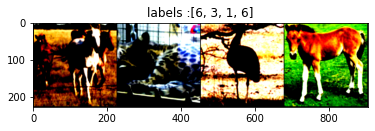

In [9]:
# display sample images 
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

# np.random.seed(1)
# torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print('image indices:',rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

## 2. 구조 만들기

<br>

### Residual Block

<p align="center"><img src="https://d2l.ai/_images/resnet-block.svg" width="500"></p>

In [10]:
class BasicBlock(nn.Module):
    # channel 수 늘어날 때, output의 차원 조절
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        # Conv -> BN -> ReLU -> Conv -> BN
        # nn.Sequential은 각각의 층을 쌓아주는 역할
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        # identity mapping(input과 output의 feature map size, filter 수가 동일한 경우 사용.)
        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        # projection mapping(in, out의 차원이 다를 때)
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

### ResNet-34

<p align="center"><img src="https://editor.analyticsvidhya.com/uploads/38371XTo6Q.png" width="400"></p>

<br>

<p align="center"><img src="https://pytorch.org/assets/images/resnet.png" width="700"></p>

In [11]:
class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=10, init_weights=True):
        # block : 위에서 정의한 Residual Block
        # num_block : 파트 별 각 block 의 개수
        super().__init__()
        
        # filter 개수 64개로 시작
        self.in_channels=64
        
        ## ResNet-34 그림에서 구분된 색깔별로 conv1, ..., conv5
        # 첫 번째 7 x 7 conv
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # identity mapping 이용한 3 x 3 conv
        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)
        
        # output layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weight 초기화
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1) # -1 : 자동으로 차원 맞춰준다. 
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

<br>

* 만들어진 모형 확인

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet34().to(device)                # model on GPU
x = torch.randn(3, 3, 224, 224).to(device)   # data on GPU
output = model(x)
print(output.size())

torch.Size([3, 10])


In [13]:
summary(model, (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

* Parameter 수에 대한 계산을 해보면 정확한 수의 parameter로 모형이 만들어진 것을 알 수 있다.
    1. 예를 들어, 가장 첫 번째 Conv layer를 생각하면 $224 \times 224 \times 3$ 의 데이터에 $7 \times 7 \times 3$ 의 필터 64개가 convolution 연산에 사용된다. 따라서
    
    $$(7 \times 7 \times 3) \times 64 = 9,408$$
    
    개의 params가 필요하다.
    
    2. BN 과정에선 64개의 channel에 대해 $\gamma, \beta$ 가 필요하기 때문에
    
    $$2 \times 64 = 128$$
    
    의 params가 필요하다.
    
    
    3. ReLU 함수와 Pooling 과정에선 parameter가 필요없다. (0)
    

<br>

## 3. 모형 학습

* Loss function / Optimization Method

In [14]:
# 손실 함수로 crossentropy 함수 사용.
# reduction='sum' : 합한 값을 리턴
loss_func = nn.CrossEntropyLoss(reduction='sum')

# Optimization 함수로 Adam을 이용.
opt = optim.Adam(model.parameters(), lr=0.001)

# 10번 동안 accuracy 개선이 이루어지지 않으면, learning rate를 0.1 (10%) 로 줄인다.
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)

* Learning rate 저장하는 함수

In [15]:
# function to get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

* 각 mini-batch 에서의 loss, metric 계산.

In [16]:
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)                  # argmax의 index 출력
    corrects = pred.eq(target.view_as(pred)).sum().item()  # 맞춘 것의 개수
    return corrects


def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss.backward() # back propagation 과정이 자동으로 이루어짐
        opt.step()

    return loss.item(), metric_b

* 각 epoch 에서의 loss 

In [17]:
# function to calculate loss and metric per epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b
        
        if sanity_check is True:
            break

    loss = running_loss / len_data        # 각 데이터의 평균 loss값 
    metric = running_metric / len_data    # 맞춘 개수의 비율

    return loss, metric

<br><br>

* 학습을 진행하는 train_val 함수

In [18]:
# function to start training
def train_val(model, params): # model : ResNet-34
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
#     path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss

            print('Get best val_loss')

        lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    return model, loss_history, metric_history

In [20]:
# definc the training parameters
params_train = {
    'num_epochs':60,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

<br>

* 모형학습

In [21]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/59, current lr=0.001
Get best val_loss
train loss: 1.906893, val loss: 1.838223, accuracy: 27.80, time: 1.8935 min
----------
Epoch 1/59, current lr=0.001
train loss: 1.711235, val loss: 2.005734, accuracy: 25.50, time: 3.7734 min
----------
Epoch 2/59, current lr=0.001
Get best val_loss
train loss: 1.657437, val loss: 1.702303, accuracy: 33.06, time: 5.6438 min
----------
Epoch 3/59, current lr=0.001
Get best val_loss
train loss: 1.579703, val loss: 1.636876, accuracy: 37.80, time: 7.5198 min
----------
Epoch 4/59, current lr=0.001
train loss: 1.526695, val loss: 1.735830, accuracy: 35.01, time: 9.3881 min
----------
Epoch 5/59, current lr=0.001
Get best val_loss
train loss: 1.446652, val loss: 1.397253, accuracy: 47.34, time: 11.2552 min
----------
Epoch 6/59, current lr=0.001
train loss: 1.373143, val loss: 1.431520, accuracy: 48.20, time: 13.1223 min
----------
Epoch 7/59, current lr=0.001
Get best val_loss
train loss: 1.280482, val loss: 1.293679, accuracy: 51.44, time: 14

<br>

* Loss 시각화

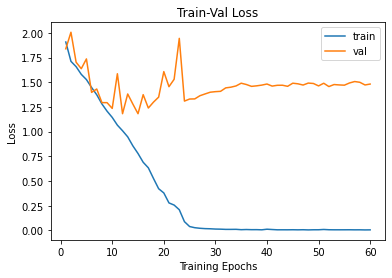

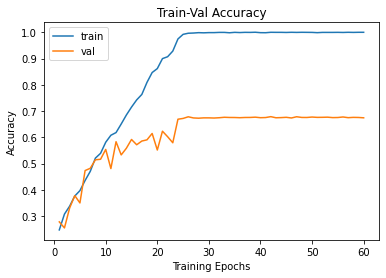

In [22]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

<br><br>

--- 

* Reference

[Deep Residual Learning for Image Recognition, Kaiming He, 2015](https://arxiv.org/pdf/1512.03385.pdf)

https://d2l.ai/chapter_convolutional-modern/resnet.html

https://deep-learning-study.tistory.com/534